In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
df = pd.read_csv('attendance_anonymised-1.csv')

# Quick inspection
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17053 entries, 0 to 17052
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Person Code             17053 non-null  int64 
 1   Unit Instance Code      17053 non-null  int64 
 2   Calocc Code             17053 non-null  int64 
 3   Surname                 17053 non-null  object
 4   Forename                17053 non-null  object
 5   Long Description        17053 non-null  object
 6   Register Event ID       17053 non-null  int64 
 7   Object ID               17053 non-null  int64 
 8   Register Event Slot ID  17053 non-null  int64 
 9   Planned Start Date      17053 non-null  object
 10  Planned End Date        17053 non-null  object
 11  is Positive             17038 non-null  object
 12  Postive Marks           17053 non-null  int64 
 13  Negative Marks          17053 non-null  int64 
 14  Usage Code              17038 non-null  object
dtypes:

,Person Code,Unit Instance Code,Calocc Code,Register Event ID,Object ID,Register Event Slot ID,Postive Marks,Negative Marks
count,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000
mean,258.244473,1252.674016,2023.913212,495.752536,504.818742,572.408139,0.716531,0.732892
std,146.904888,530.609058,0.774686,292.031166,275.174454,313.946746,0.450695,0.442462
min,1.000000,4.000000,2023.000000,1.000000,7.000000,0.000000,0.000000,0.000000
25%,146.000000,840.000000,2023.000000,223.000000,267.000000,297.000000,0.000000,0.000000
50%,265.000000,1306.000000,2024.000000,515.000000,504.000000,574.000000,1.000000,1.000000
75%,384.000000,1749.000000,2025.000000,788.000000,733.000000,839.000000,1.000000,1.000000
max,498.000000,1945.000000,2025.000000,984.000000,984.000000,1124.000000,1.000000,1.000000


In [3]:
# Drop column if it exists
if 'Planned End Date' in df.columns:
    df.drop('Planned End Date', axis=1, inplace=True)

# Rename columns
rename_map = {
    'Person Code' : 'Person Code',
    'Unit Instance Code' : 'Module Code',
    'Calocc Code' : 'Year',
    'Surname' : 'Surname',
    'Forename': 'Forename',
    'Long Description' : 'Module Name',
    'Register Event ID' : 'Event ID',
    'Object ID' : 'Object ID',
    'Planned Start Date' : 'Date',
    'is Positive' : 'Has Attended',
    'Postive Marks' : 'Attended',
    'Negative Marks' : 'NotAttended',
    'Usage Code' : 'Attendance Code',
}
df.rename(columns=rename_map, inplace=True)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Ensure attendance columns are numeric
if 'Attended' in df.columns:
    df['Attended'] = pd.to_numeric(df['Attended'], errors='coerce')

df.head()


,Person Code,Module Code,Year,Surname,Forename,Module Name,Event ID,Object ID,Register Event Slot ID,Date,Has Attended,Attended,NotAttended,Attendance Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A


In [4]:
# Unique modules
print(df['Module Name'].unique())

# Example module
my_module = 'Cybersecurity'
module_df = df[df['Module Name'] == my_module].copy()

# Check types
module_df.dtypes


['Nursing' 'Italian' 'History' 'Arabic' 'Database Design' 'Spanish'
 'Journalism' 'International Business' 'Project Management' 'Algorithms'
 'System Administration' 'Public Speaking' 'Cloud Computing'
 'English Literature' 'Cybersecurity' 'Discrete Mathematics' 'Linguistics'
 'French' 'Music Theory' 'Religious Studies' 'Marketing'
 'User Experience Design' 'Theater' 'Biology' 'Statistics' 'Nutrition'
 'Chemistry' 'Linear Algebra' 'Leadership' 'Biomedical Engineering'
 'Digital Systems' 'Political Science' 'Arts & Crafts'
 'Occupational Therapy' 'Quality Assurance' 'Ethics' 'Creative Writing'
 'Information Technology' 'Graphic Design' 'Data Science'
 'Web Development' 'Japanese' 'Data Analysis' 'Epidemiology' 'Geography'
 'Medicine' 'Strategic Planning' 'Pharmacy' 'Business Intelligence'
 'Demographics']


Person Code                        int64
Module Code                        int64
Year                               int64
Surname                           object
Forename                          object
Module Name                       object
Event ID                           int64
Object ID                          int64
Register Event Slot ID             int64
Date                      datetime64[ns]
Has Attended                      object
Attended                           int64
NotAttended                        int64
Attendance Code                   object
dtype: object

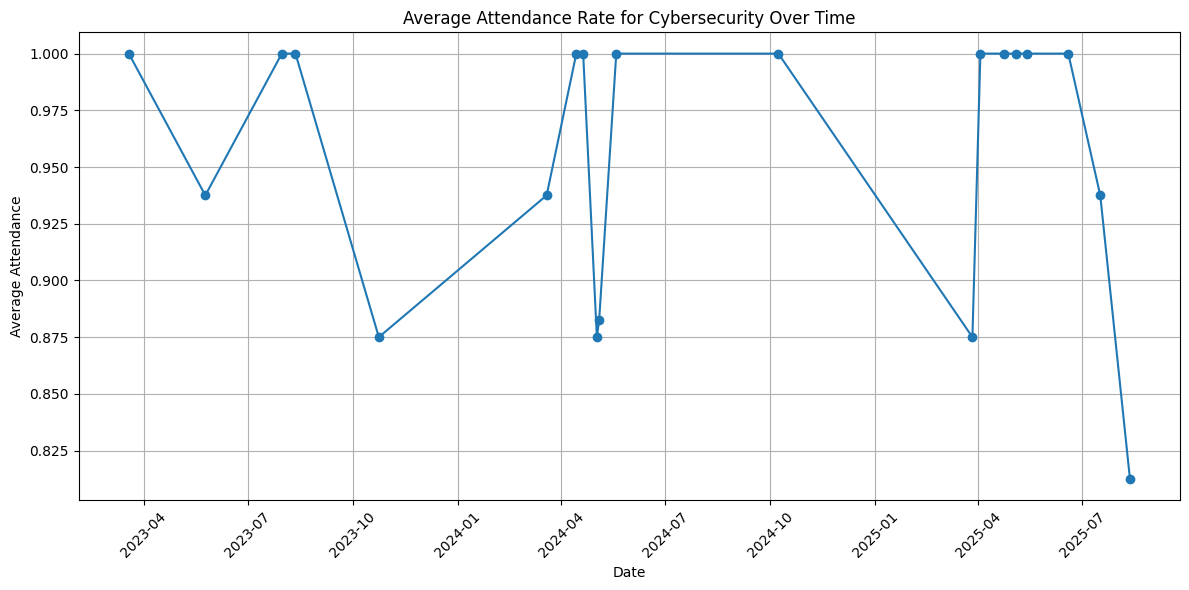

In [6]:
attendance_over_time = module_df.groupby('Date')['Attended'].mean()

plt.figure(figsize=(12,6))
plt.plot(attendance_over_time.index, attendance_over_time.values, marker='o')
plt.title(f'Average Attendance Rate for {my_module} Over Time')
plt.xlabel('Date')
plt.ylabel('Average Attendance')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
average = attendance_over_time.mean()
minimum = attendance_over_time.min()
maximum = attendance_over_time.max()

print(f"Average: {average:.1%}, Min: {minimum:.1%}, Max: {maximum:.1%}")


Average: 95.7%, Min: 81.2%, Max: 100.0%
